# Recreating plots from the paper.


In [1]:
import numpy as np
import pylab



In [3]:
import pycbc
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform,get_fd_waveform, fd_approximants


In [89]:
mt = 100.0
q = 7.0
l = np.pi/3

hp, hc = get_td_waveform(approximant="IMRPhenomXPHM",
                         mass1=mt / (1 + q), 
                         mass2=mt * q / (1 + q), 
                         delta_t=1.0/4096, 
                         f_lower=30.0, 
                         inclination=l)

hpt = hp.to_frequencyseries()
shifted_hp_time , shifted_hc_time = get_td_waveform(approximant="IMRPhenomXPHM",
                         mass1=mt / (1 + q), 
                         mass2=mt * q / (1 + q), 
                         delta_t=1.0/4096, 
                         f_lower=30.0, 
                         coa_phase = -np.pi/4,
                         inclination=l)




In [90]:
function = np.sqrt(1.0)*np.exp( -1j*np.pi/2)
hpt *= function
hp2t = hpt.to_timeseries(delta_t = hpt.delta_t)

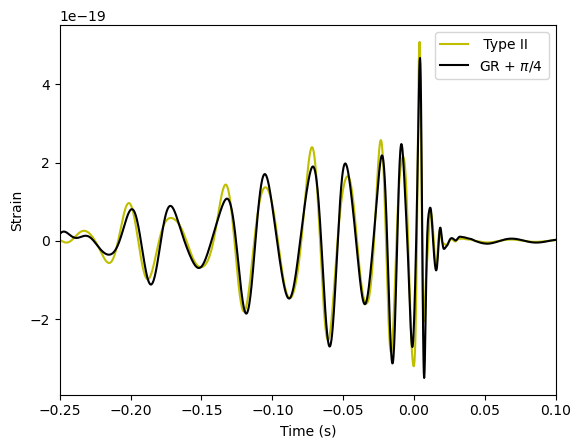

In [91]:

pylab.plot(hp2t.sample_times, hp2t,'-y', label=" Type II")
pylab.plot(shifted_hp_time.sample_times, shifted_hp_time,'k', label=r'GR + $ \pi /4$')
#pylab.plot(hp.sample_times, hp,'-r', label='GR')

pylab.xlim(-.25, .1)
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

In [92]:

detector = pycbc.detector.Detector("H1")  
ra = 30.0  
dec = -30.0  
psi = 0.7853
ra_rad = np.deg2rad(ra)
dec_rad = np.deg2rad(dec)


F_plus, F_cross = detector.antenna_pattern(ra_rad, dec_rad, psi,t_gps = 1126259462)

h = F_plus*hp + F_cross*hc


In [93]:

shifted_h = F_plus*shifted_hp_time + F_cross*shifted_hc_time

ht = h.to_frequencyseries()

function = np.sqrt(1.0)*np.exp( -1j*np.pi/2)
ht *= function
h2t = ht.to_timeseries(delta_t = ht.delta_t)


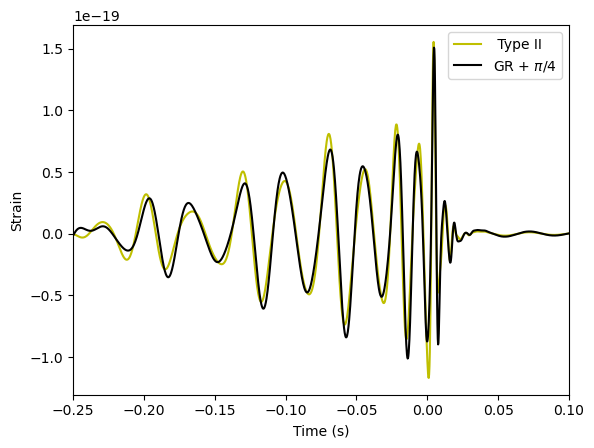

In [94]:
#pylab.plot(h.sample_times, h,'-r', label='GR')
pylab.plot(h2t.sample_times, h2t,'-y', label=" Type II")
pylab.plot(shifted_h.sample_times, shifted_h,'k', label=r'GR + $ \pi /4$')
pylab.xlim(-.25, .1)
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

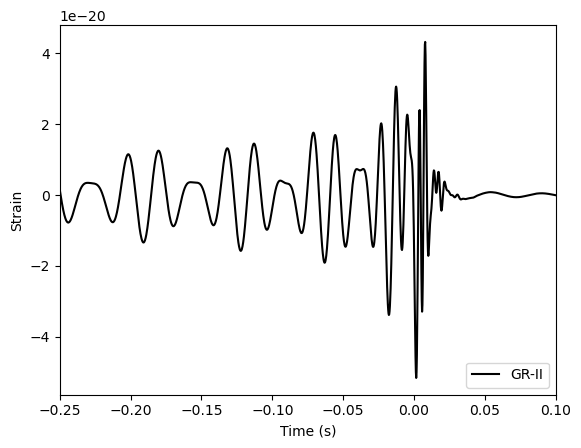

In [100]:
h_residual = h2t-shifted_h
#h_residd = hp2t - shifted_hp_time
#
#pylab.plot(h_residd.sample_times, h_residd,'-k', label='GR-II')
pylab.plot(h_residual.sample_times, h_residual,'-k', label='GR-II')
pylab.xlim(-.25, .1)
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend(loc = "lower right")
plt.show()
